Life Expectancy (WHO)  https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

Los conjuntos de datos se ponen a disposición del público con el fin de realizar análisis de datos de salud. El conjunto de datos relacionados con la esperanza de vida y los factores de salud de 193 países se recopiló del mismo sitio web del repositorio de datos de la OMS y sus datos económicos correspondientes se recopilaron del sitio web de las Naciones Unidas. Entre todas las categorías de factores relacionados con la salud, sólo se eligieron aquellos factores críticos que son más representativos. Luego, todas las variables predictivas se dividieron en varias categorías amplias: factores relacionados con la inmunización, factores de mortalidad, factores económicos y factores sociales.

In [2]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [3]:
df = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Ciencia de Datos con Python IEEE AESS\codigo\base de datos\Life Expectancy Data.csv')

In [279]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [280]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [281]:
df.shape

(2938, 22)

In [282]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [283]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [284]:
#buscando valores nulos en el dataframe:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [285]:
Z = df.drop(columns=["Country","Status"])

In [286]:
Z.head() 

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [287]:
Z.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [288]:
#Eliminando valores NAN
Z = Z.dropna()


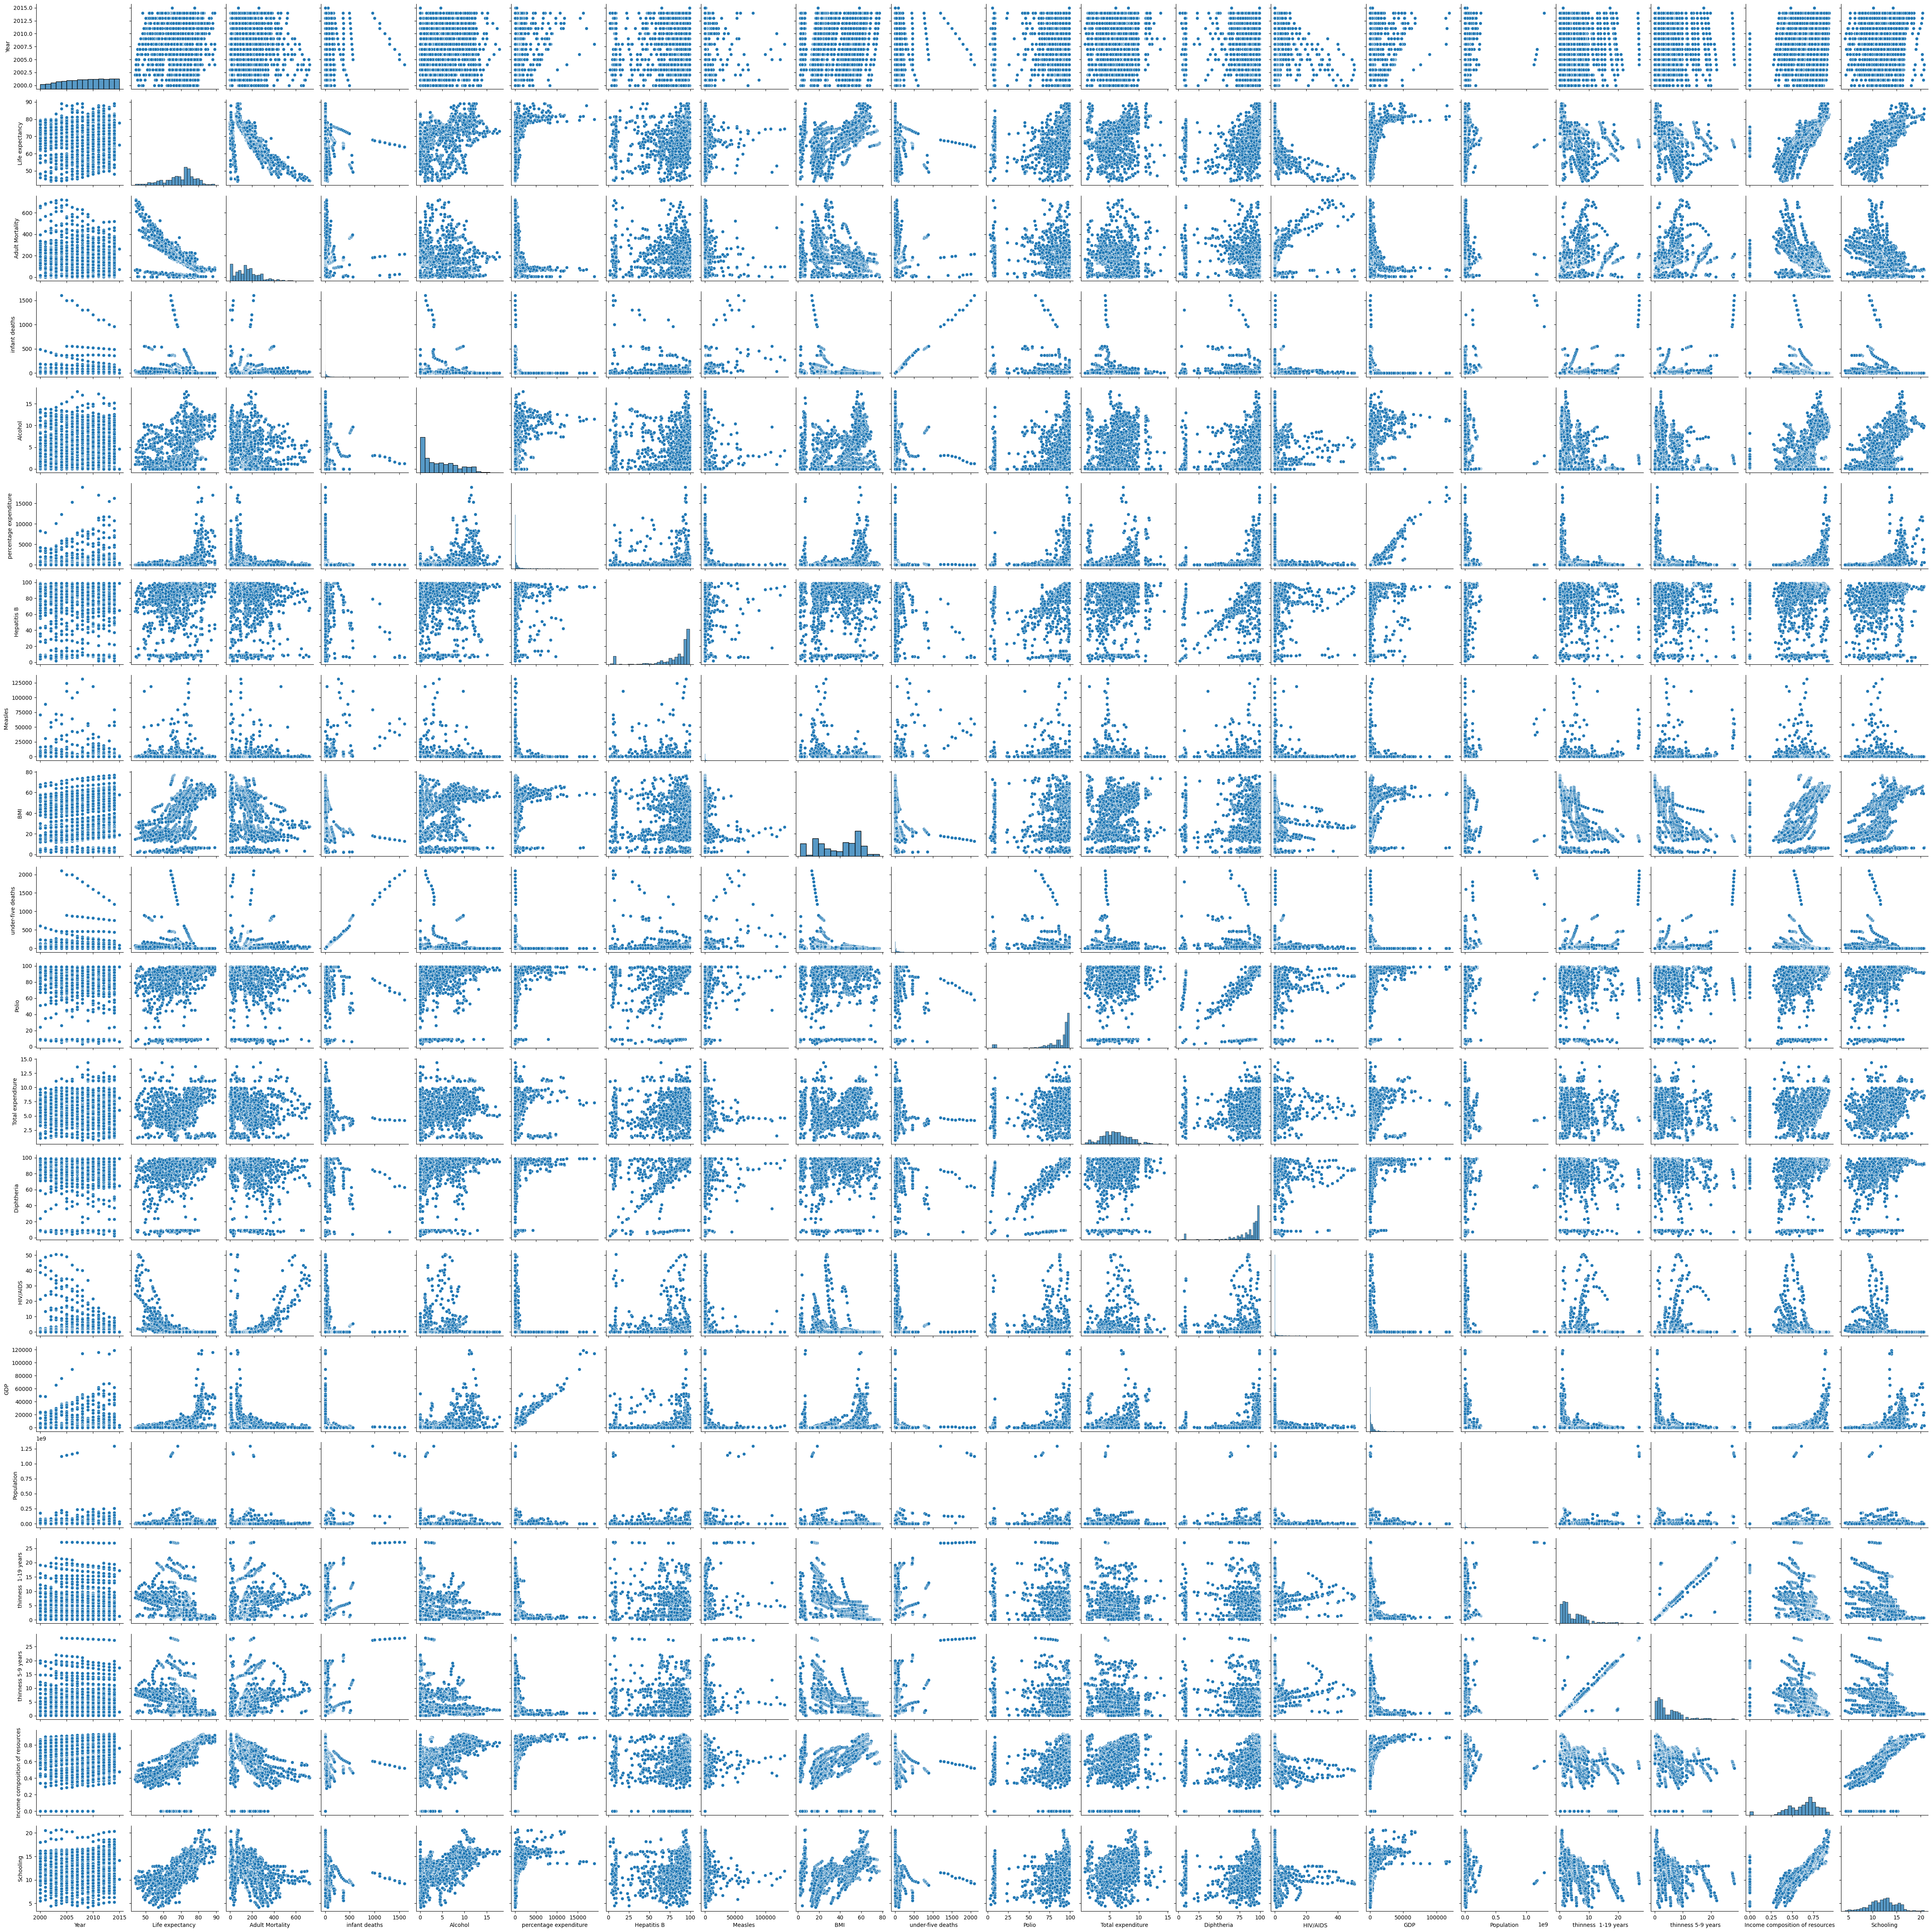

In [289]:
sns.pairplot(Z)
plt.show()

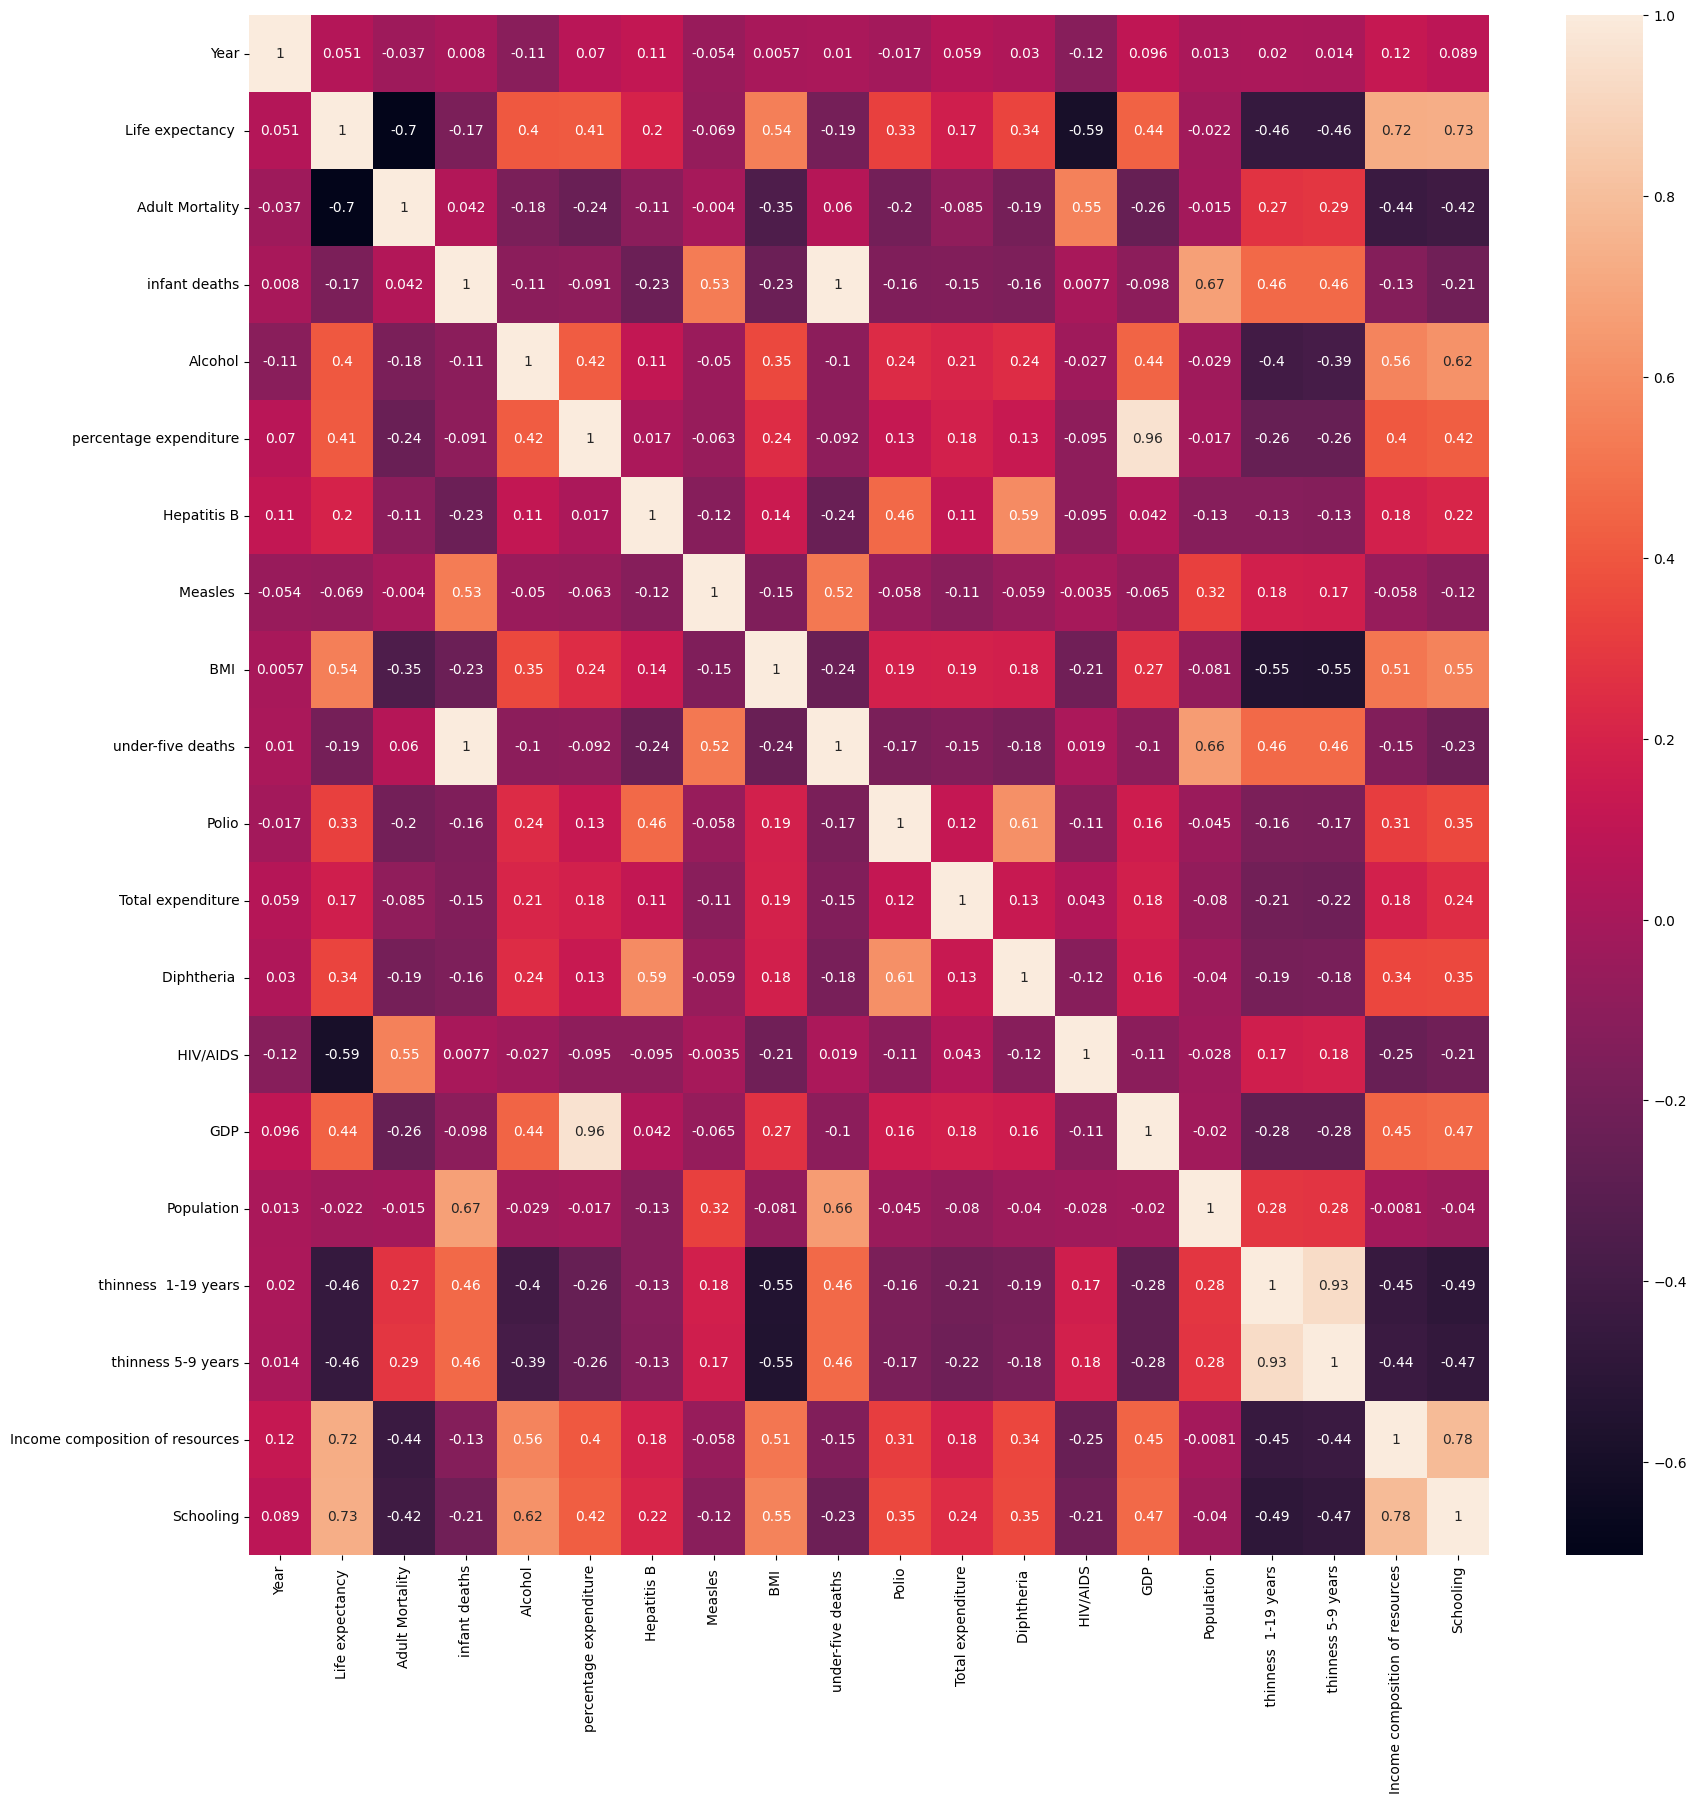

In [290]:
sns.heatmap(data=Z.corr(), annot=True)
plt.rcParams['figure.figsize'] = (20,20)
plt.show()

In [291]:
#Eligiendo las mejores variables para la regresion Lineal

X = Z["Schooling"].values.reshape(-1, 1)  # Cambiar la forma para sklearn
Y = Z['Life expectancy ']

In [292]:
#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state=42)

#Crear y entrenar el modelo de regresión multiple
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [293]:
#Predecir y evaluar el modelo:
y_train_predict = modelo.predict(X_test)
mse = mean_squared_error(y_test,y_train_predict)
r2 = r2_score(y_test, y_train_predict)
#Coeficientes de la funcion
print("Evaluacion del modelo: ")
print("MSE (Error Cuadratico Medio): ",mse) 
print('R2 Coeficiente de Determinación {}'.format(r2))

Evaluacion del modelo: 
MSE (Error Cuadratico Medio):  35.137487930195526
R2 Coeficiente de Determinación 0.5052624786801316


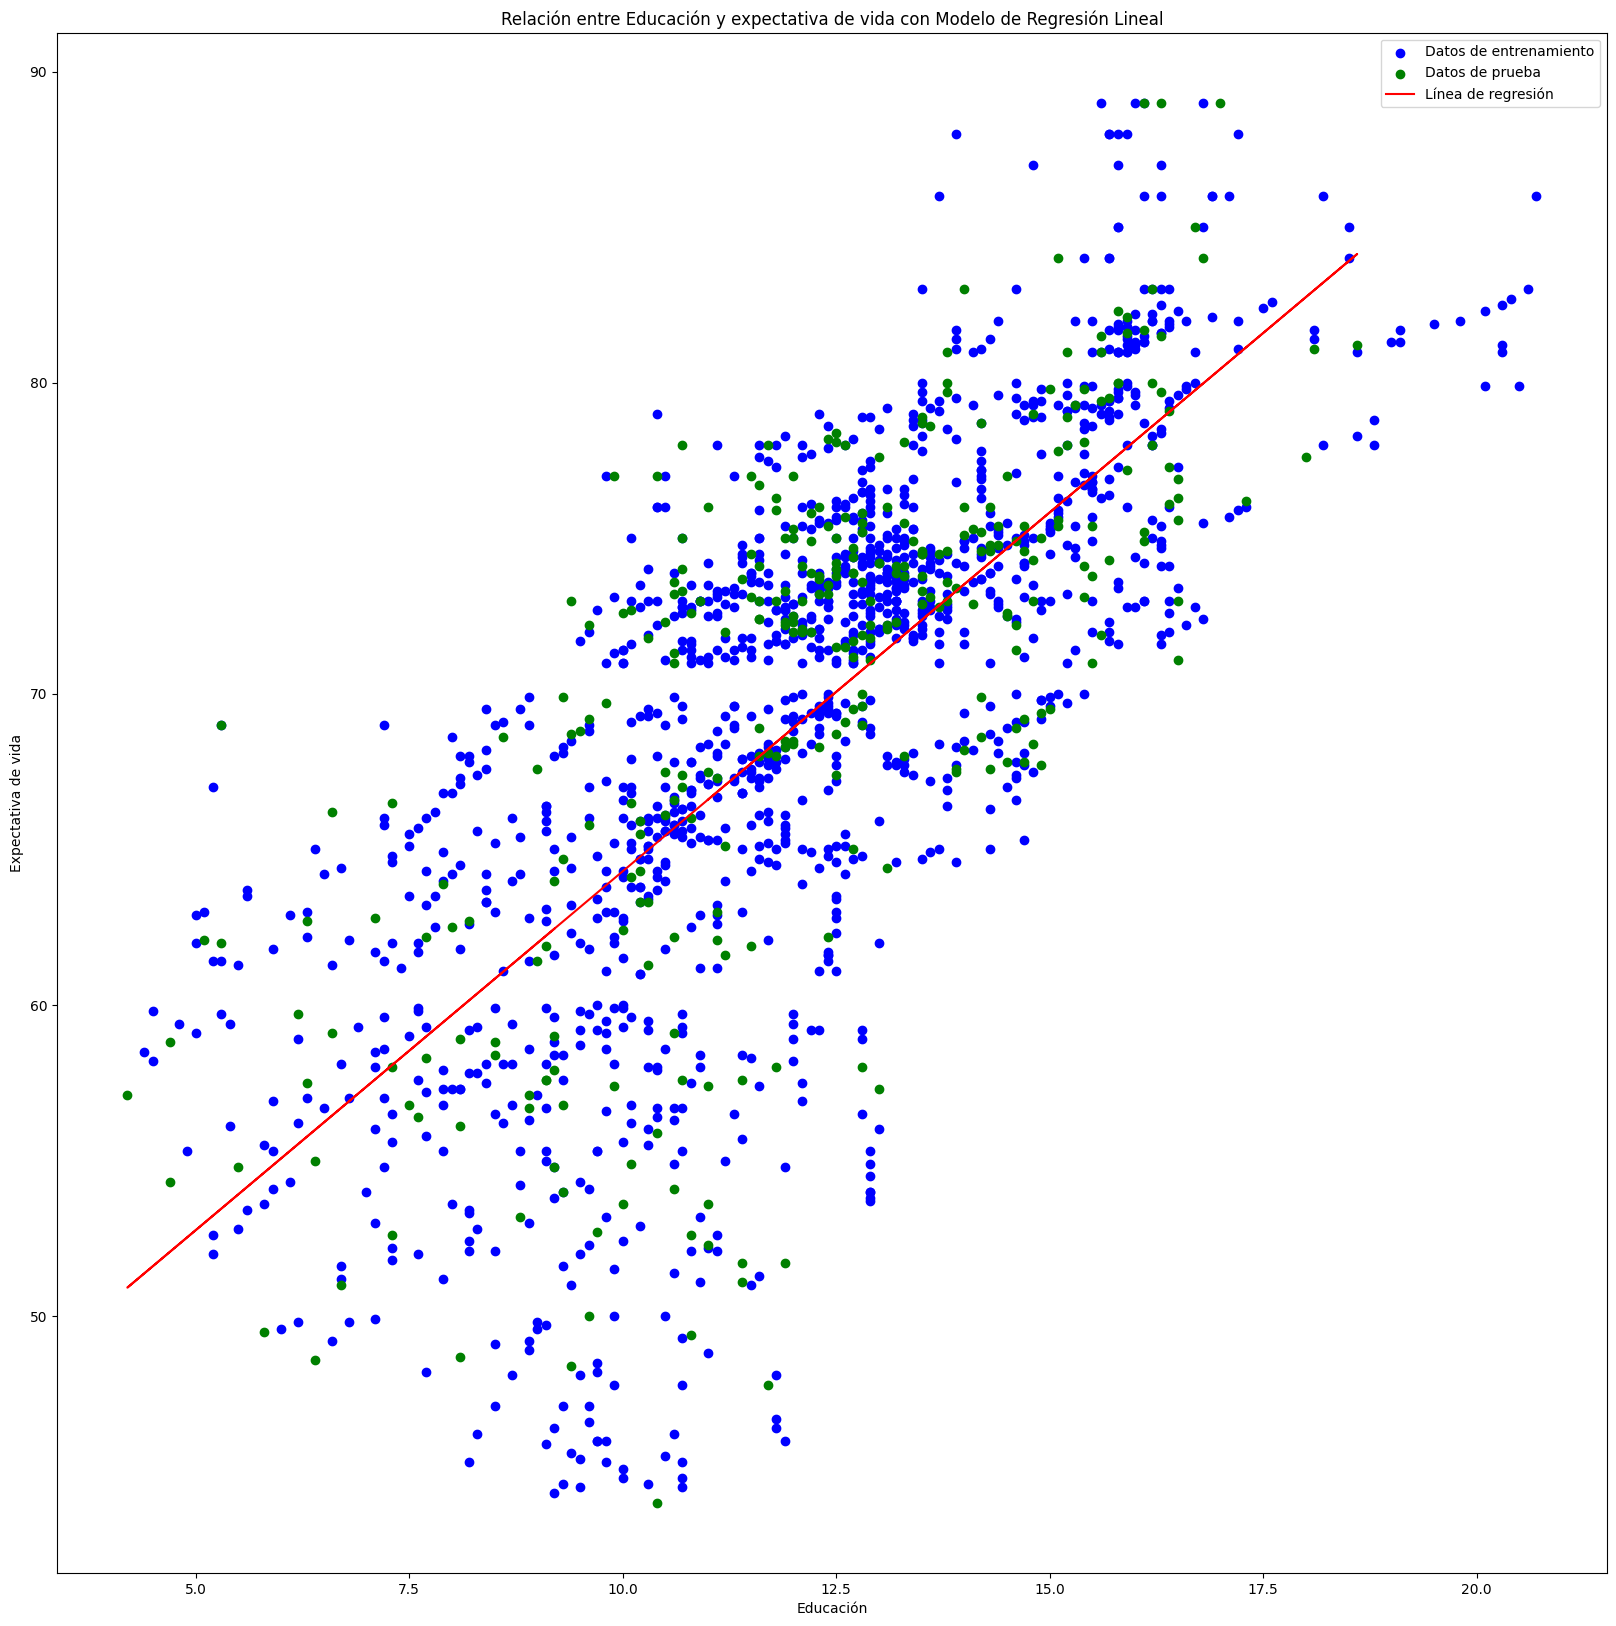

In [294]:
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_test, y_train_predict, color='red', label='Línea de regresión')
plt.title('Relación entre Educación y expectativa de vida con Modelo de Regresión Lineal')
plt.xlabel('Educación')
plt.ylabel('Expectativa de vida')
plt.legend()
plt.show()

# REGRESION MULTIPLE

In [295]:
X1 = Z[["Schooling", 'Income composition of resources'," BMI "]] #ESCOGIENDO LAS MEJORES VARIABLES A ANALIZAR
Y1 = Z['Life expectancy ']

In [296]:
#Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size =0.2, random_state=42)

#Crear y entrenar el modelo de regresión multiple
modelo1 = LinearRegression()
modelo1.fit(X_train,y_train)


LinearRegression()

In [297]:
#Predecir y evaluar el modelo:
y_train_predict1 = modelo1.predict(X_test)
mse = mean_squared_error(y_test,y_train_predict)
r2 = r2_score(y_test, y_train_predict1)
#Coeficientes de la funcion
print("Evaluacion del modelo: ")
print("MSE (Error Cuadratico Medio): ",mse) 
print('R2 Coeficiente de Determinación {}'.format(r2))

Evaluacion del modelo: 
MSE (Error Cuadratico Medio):  35.137487930195526
R2 Coeficiente de Determinación 0.6189617071622138


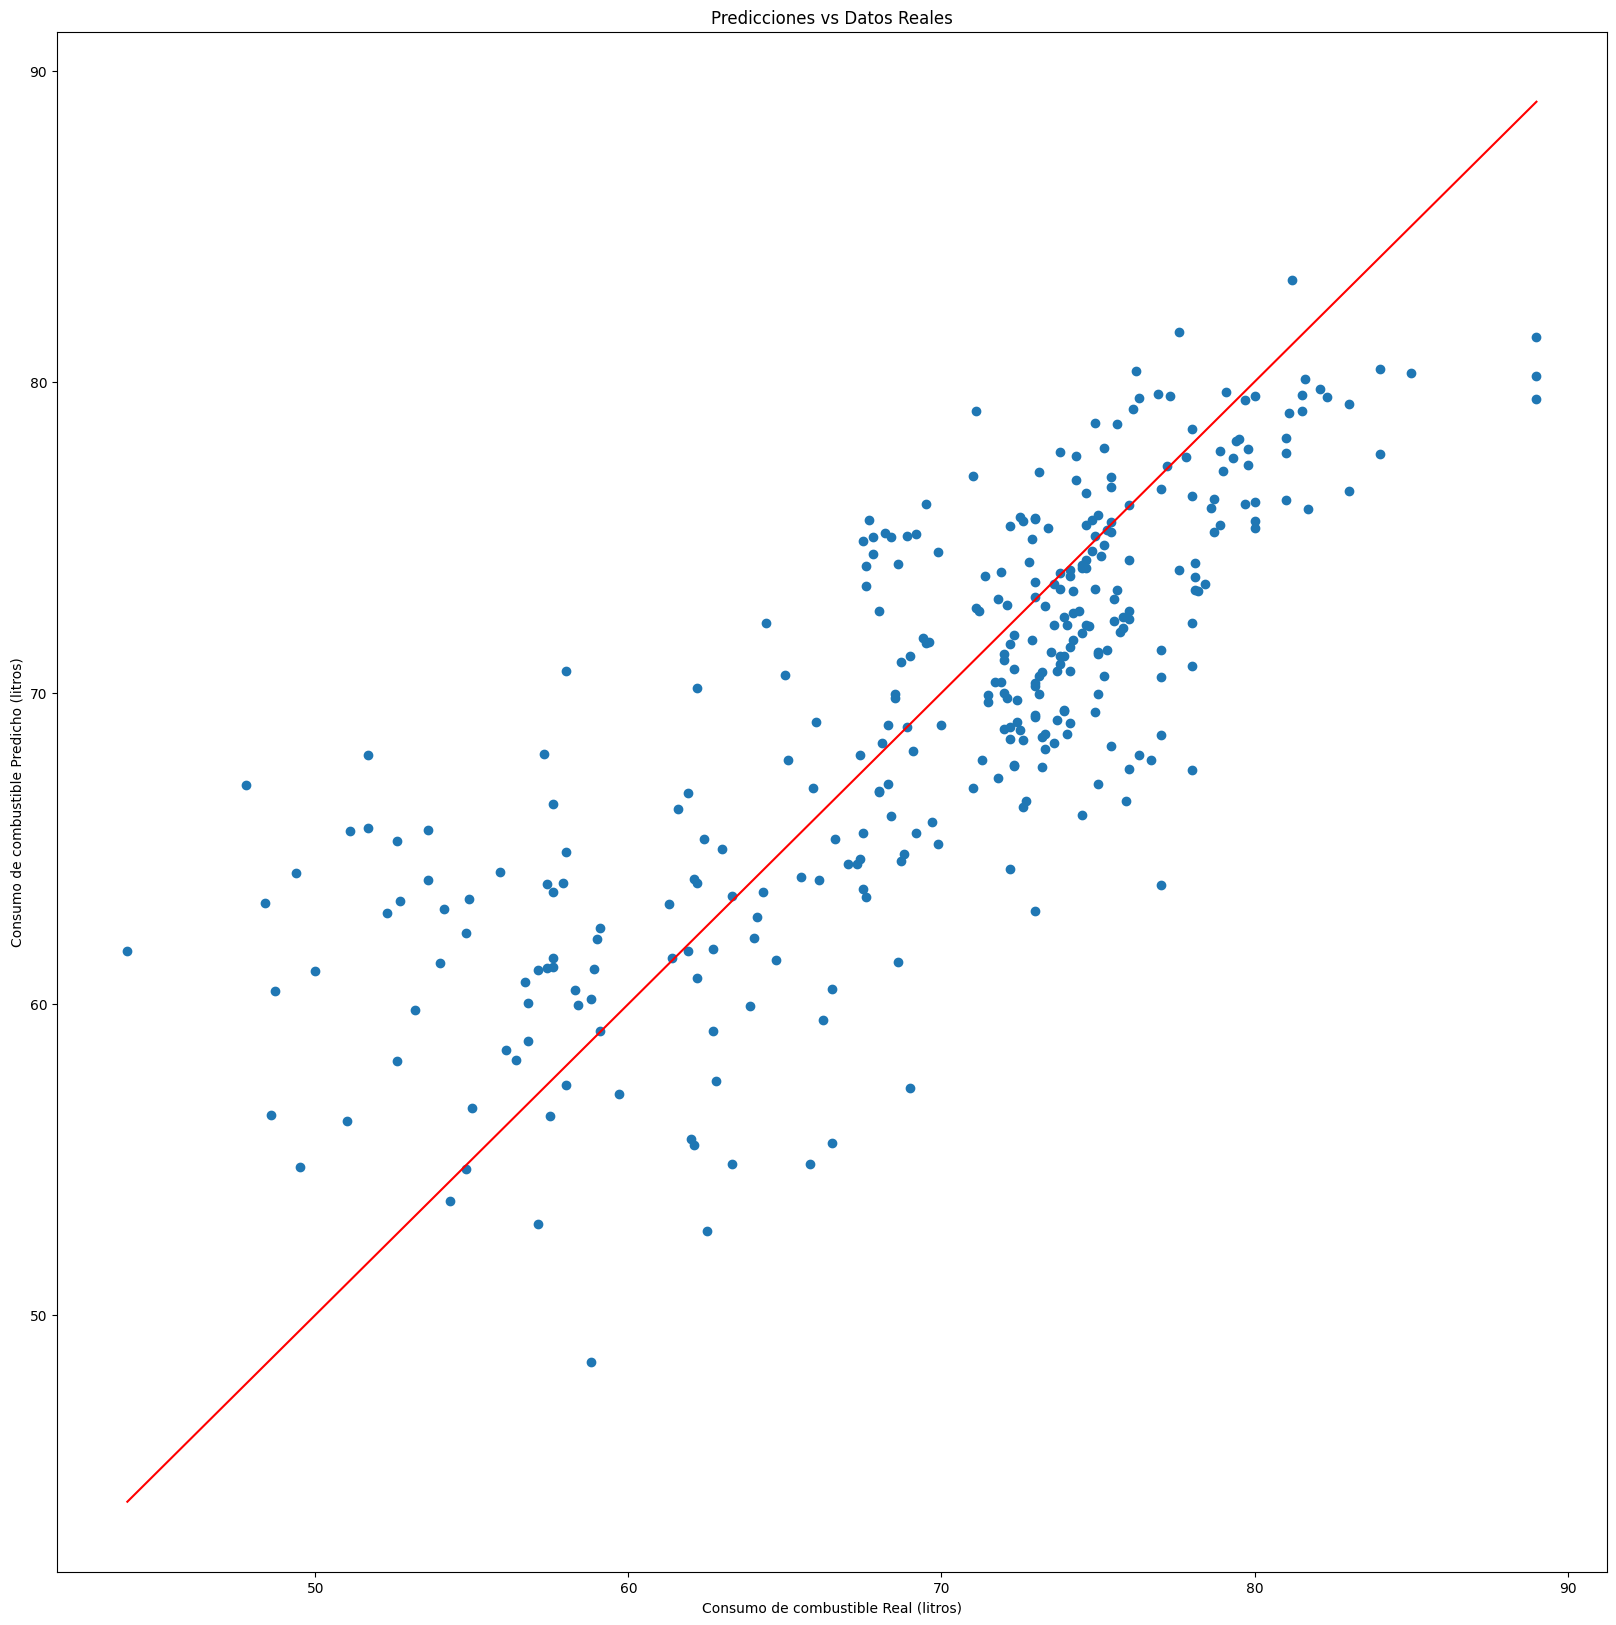

In [298]:
plt.scatter(y_test,y_train_predict1)
plt.title('Predicciones vs Datos Reales')
plt.xlabel('Consumo de combustible Real (litros)')
plt.ylabel('Consumo de combustible Predicho (litros)')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color = 'red') 
plt.show()

# REGRESION POLINOMICA

In [299]:
from sklearn.preprocessing import PolynomialFeatures




Y2 = Z["percentage expenditure"].values
X2 = Z["Life expectancy "].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)



In [300]:
# Transformar las características para la regresión polinómica
poly = PolynomialFeatures(degree=3) #regresion polinomica de grado 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [301]:
# Crear y entrenar el modelo de regresión polinómica
modelo2 = LinearRegression()
modelo2.fit(X_train_poly, y_train)

LinearRegression()

In [302]:
# Predecir y evaluar el modelo
y_pred = modelo2.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("MSE (Error Cuadrático Medio):", mse)
print("R² (Coeficiente de Determinación):", r2)

Evaluación del Modelo:
MSE (Error Cuadrático Medio): 1178254.1709006575
R² (Coeficiente de Determinación): 0.31513105355768223


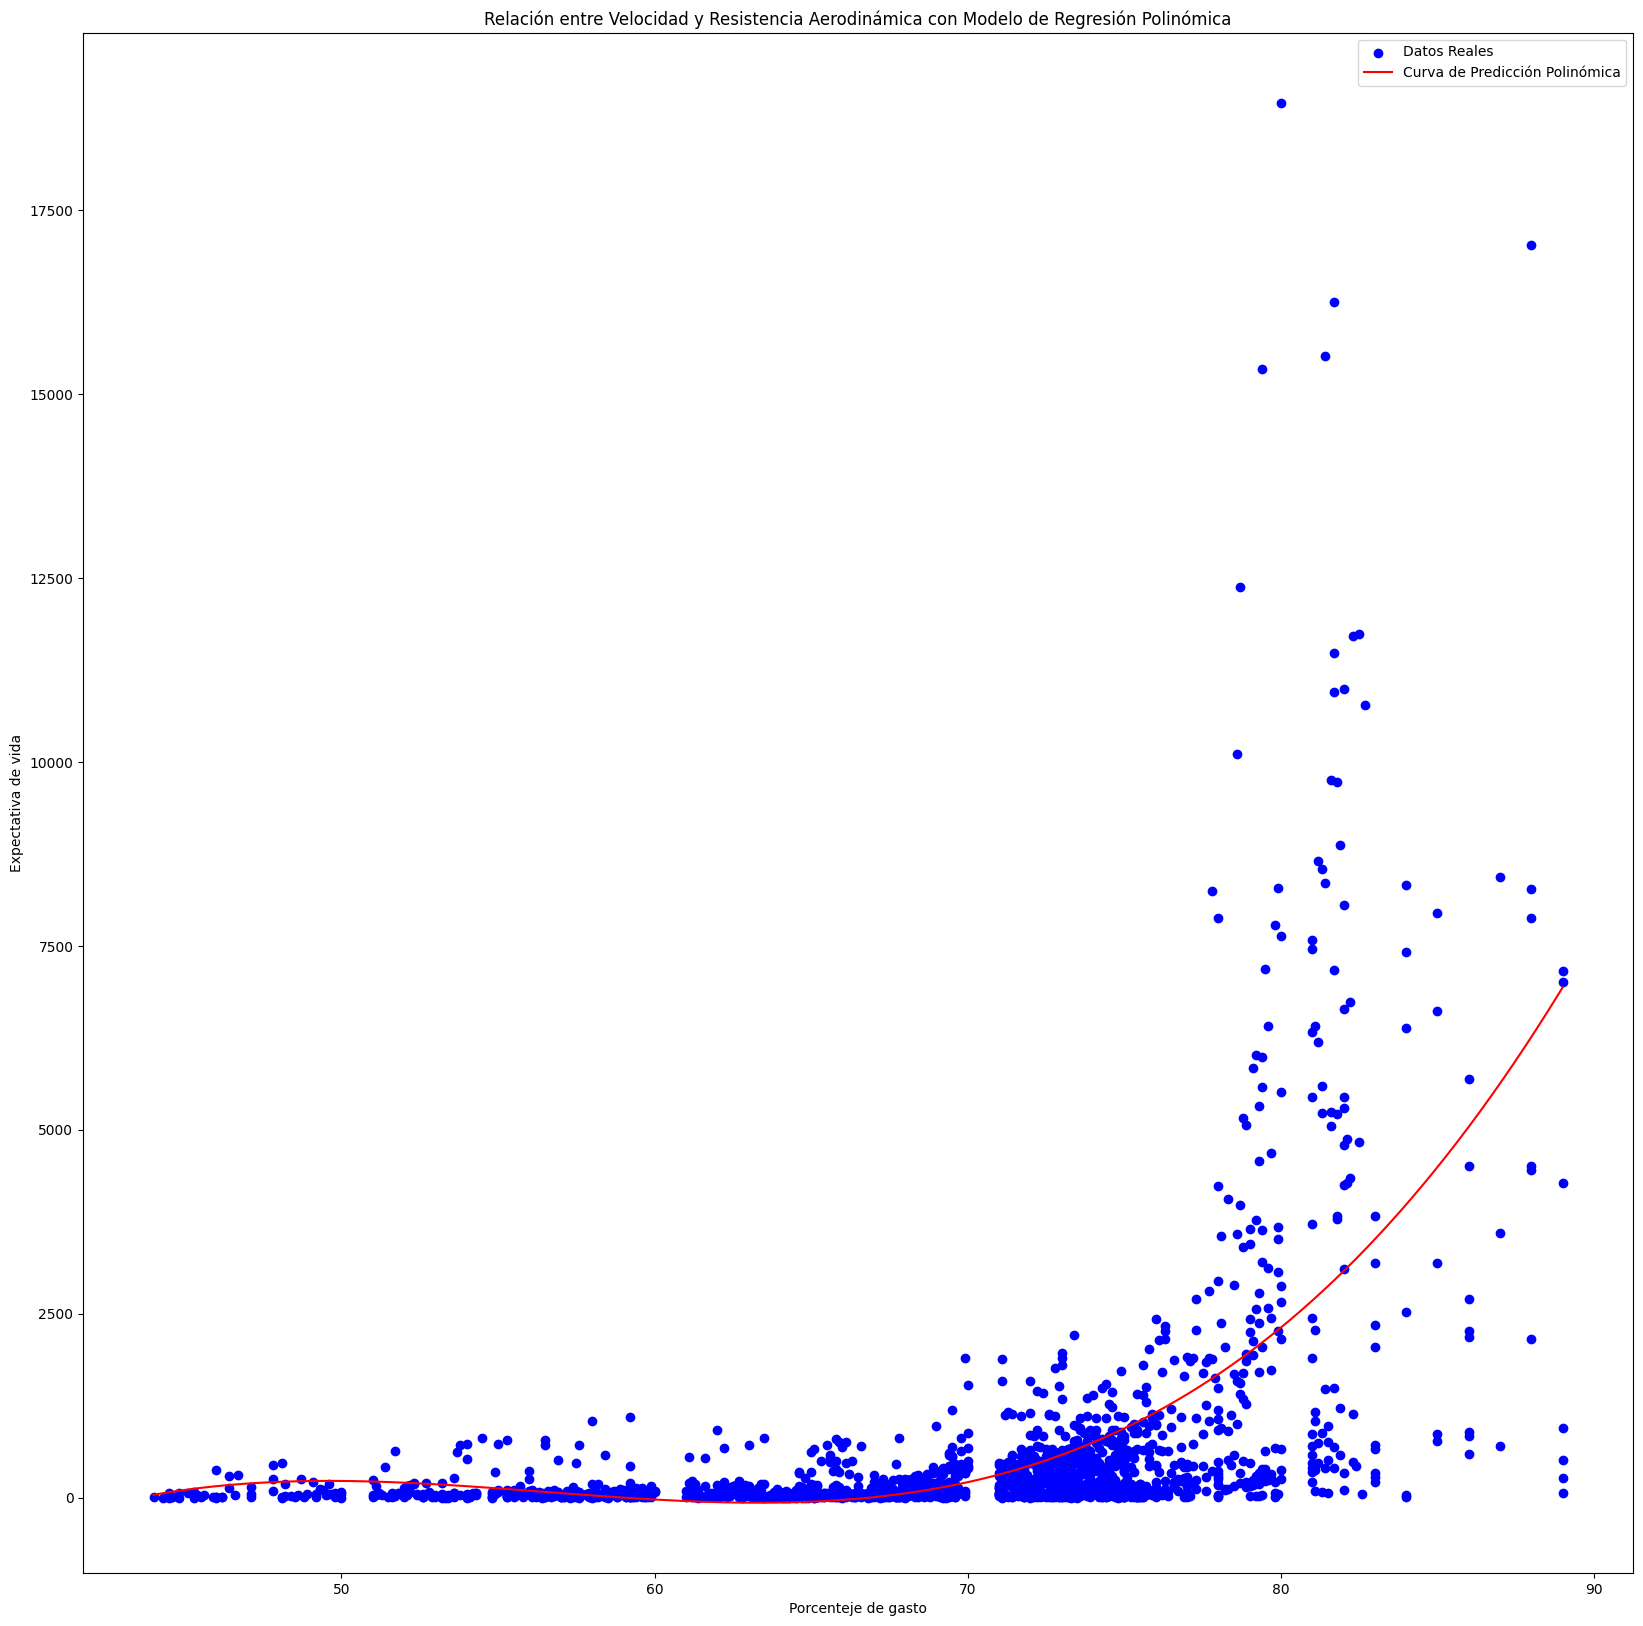

In [312]:
# Visualizar las predicciones del modelo y compararlas con los datos reales
plt.scatter(X2, Y2, color='blue', label='Datos Reales')
X_range = np.linspace(X2.min(), X2.max(), 500).reshape(-1, 1)
y_range_pred = modelo2.predict(poly.transform(X_range))
plt.plot(X_range, y_range_pred, color='red', label='Curva de Predicción Polinómica')
plt.title('Relación entre Velocidad y Resistencia Aerodinámica con Modelo de Regresión Polinómica')
plt.xlabel('Porcenteje de gasto')
plt.ylabel('Expectativa de vida')
plt.legend()
plt.show()

# ARBOLES DE REGRESION

In [304]:
from sklearn.tree import DecisionTreeRegressor

X3 = Z[["Schooling", 'Income composition of resources'," BMI "]] #ESCOGIENDO LAS MEJORES VARIABLES A ANALIZAR
Y3 = Z['Life expectancy ']

X_train, X_test, y_train, y_test =train_test_split(X3, Y3, test_size=0.2, random_state = 42)

modelo3 = DecisionTreeRegressor()
modelo3.fit(X3, Y3)


DecisionTreeRegressor()

In [305]:
y_expected = y_test
y_predicted =modelo3.predict(X_test)
print("The model performance for test set")
print("-- ---")
print('R2 score is {}'.format(metrics.r2_score(y_expected, y_predicted)))

The model performance for test set
-- ---
R2 score is 1.0


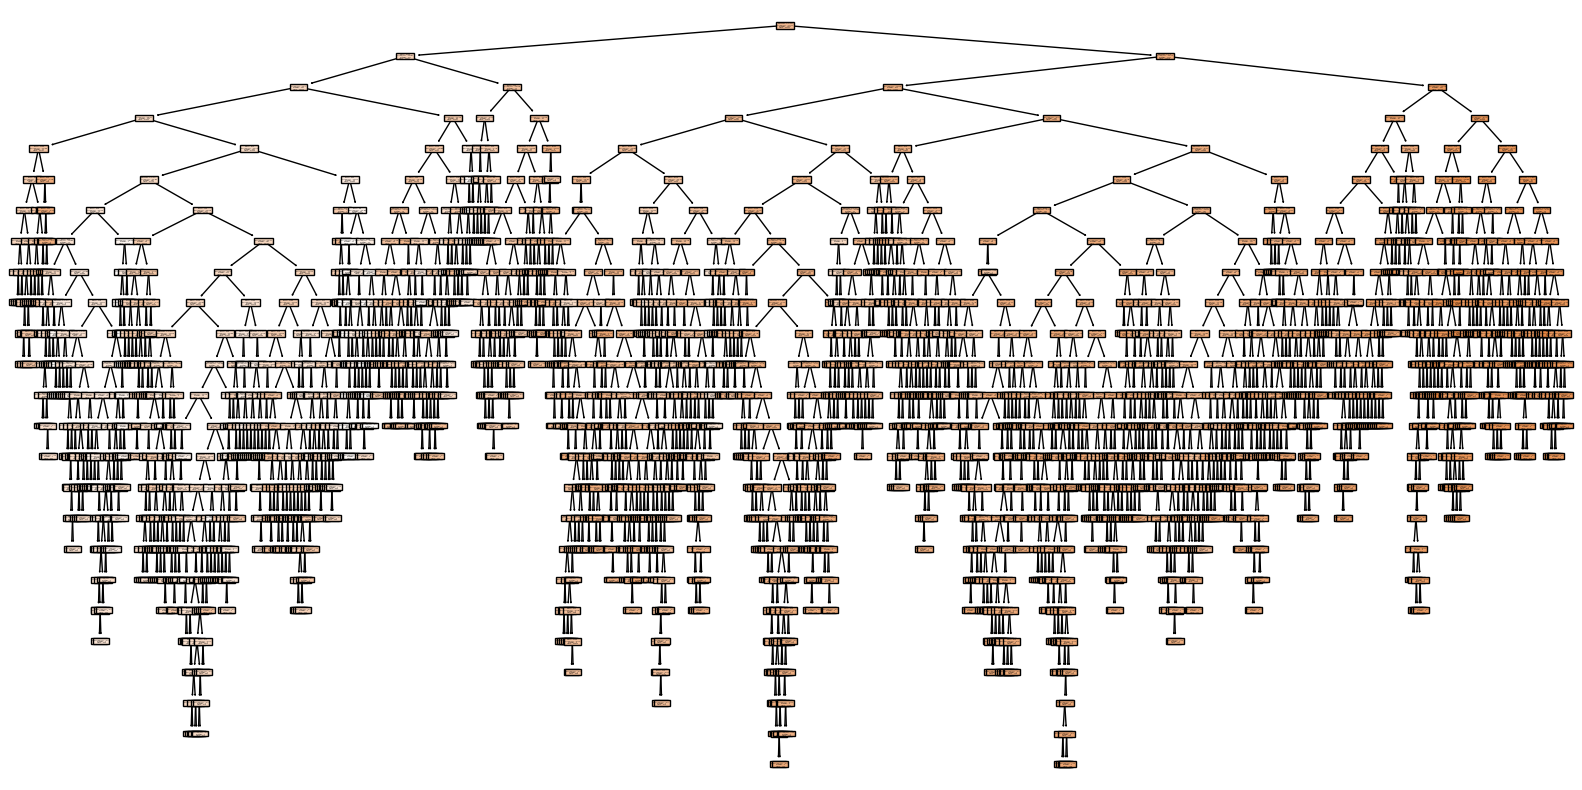

In [306]:
# Visualizar el árbol
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(modelo3, feature_names=['sqft', 'bedrooms', 'age'], filled=True)
plt.show()

# BOSQUES DE REGRESION

In [307]:
from sklearn.ensemble import RandomForestRegressor


# Separar características y objetivo
X4 = Z[["Schooling", 'Income composition of resources'," BMI "]] #ESCOGIENDO LAS MEJORES VARIABLES A ANALIZAR
Y4 = Z['Life expectancy ']


# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosque Aleatorio con parámetros ajustados
model = RandomForestRegressor(n_estimators =100, random_state = 0)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

In [308]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 10.026821512121183
Coeficiente de Determinación (R^2): 0.858821870491185


In [309]:
from sklearn.utils import Bunch

nombres_columnas = ["Schooling", 'Income composition of resources'," BMI "]

dataset = Bunch(data=X4, target=Y4, feature_names=nombres_columnas[:-1], target_names=['consumo_combustible'])

X_features= dataset.data
y_features = dataset.target

In [310]:
y_predicted = model.predict(X_features)
dfAP = pd.DataFrame({'Actual': Y4, 'Predicción': y_predicted})
dfAP.head(10)

Actual  Predicción
0    65.0      63.629
1    59.9      61.421
2    59.9      60.351
3    59.5      59.447
4    59.2      59.264
5    58.8      59.011
6    58.6      58.506
7    58.1      58.170
8    57.5      58.586
9    57.3      58.408

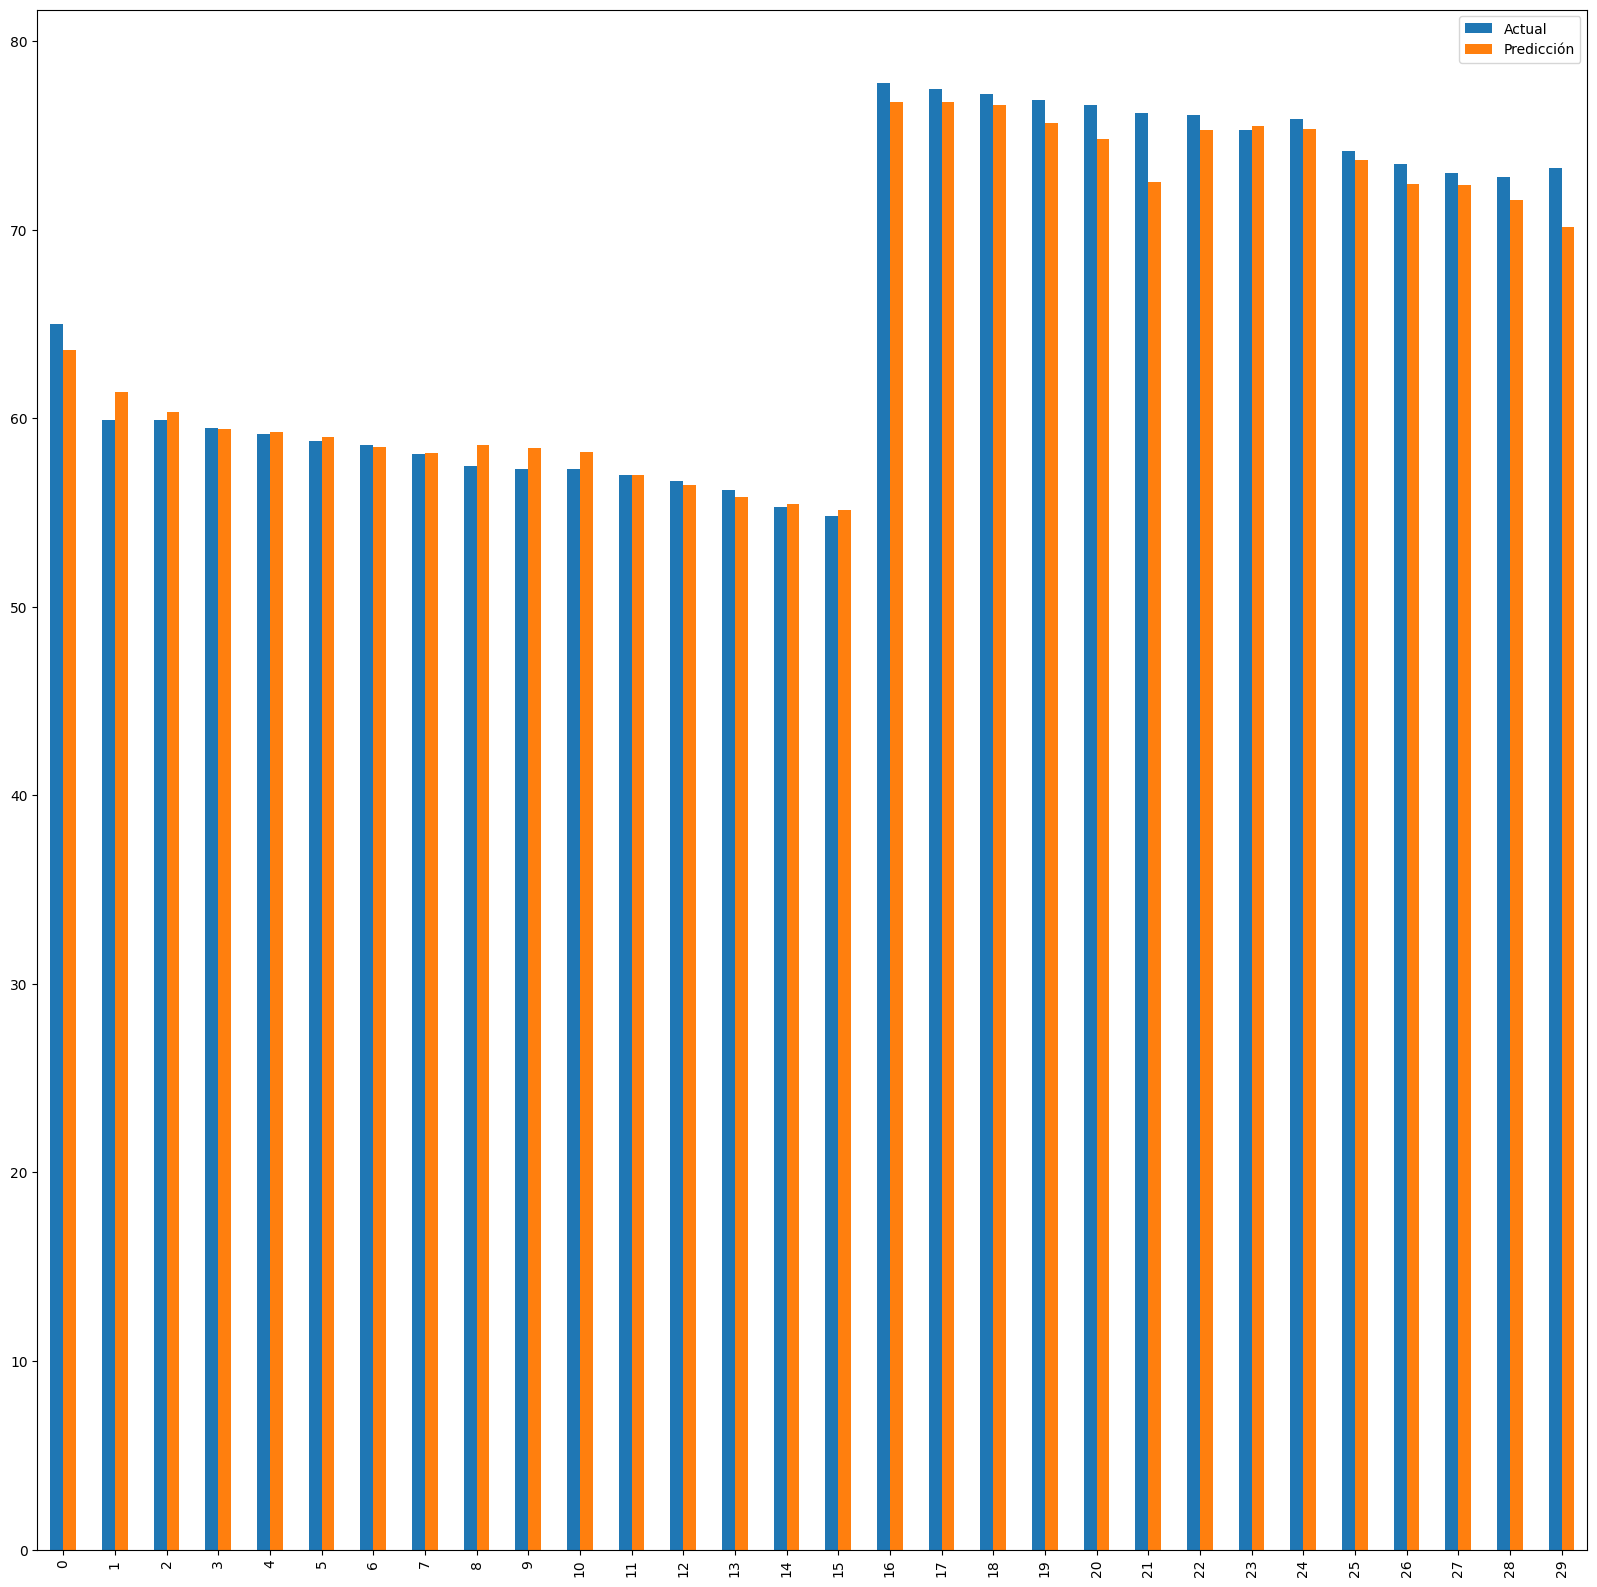

In [311]:
dfAP.head (30).plot(kind='bar')
plt.show()

El modelo predice correctamente la expectativa de vida.